In [10]:
test_data.input

InputDataset(test_data=TestData(dataset=Map(fn=<gluonts.dataset.common.ProcessDataEntry object at 0x7f896a5cc510>, iterable=JsonLinesFile(path=PosixPath('/home/user/.gluonts/datasets/electricity/test/data.json.gz'), start=0, n=None, line_starts=[0, 99873, 219668, 311560, 438110, 564118, 693652, 798498, 936090, 1061990, 1187633, 1313149, 1439625, 1564963, 1687218, 1813654, 1950313, 2055726, 2181339, 2309195, 2424945, 2530372, 2663496, 2774028, 2884049, 3010527, 3136573, 3263051, 3368786, 3495282, 3611363, 3737874, 3864352, 3990044, 4115731, 4263286, 4382338, 4508349, 4635057, 4753283, 4859663, 5007206, 5135287, 5261704, 5386458, 5512936, 5639414, 5753566, 5878724, 5993754, 6120231, 6246709, 6365892, 6492370, 6618848, 6730980, 6878677, 7005138, 7120758, 7251568, 7381094, 7508597, 7635015, 7761066, 7887544, 8011821, 8138299, 8264741, 8391106, 8511908, 8638231, 8756831, 8864064, 8990543, 9116107, 9242585, 9375604, 9502150, 9648892, 9775420, 9902543, 10033010, 10153832, 10280417, 10385709, 

/home/user/miniconda3/envs/rapids-24.06/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/user/miniconda3/envs/rapids-24.06/lib/python3.11/site-packages/uni2ts/common/env.py:43: UserWarning: Failed to load .env file.
  warnings.warn("Failed to load .env file.")


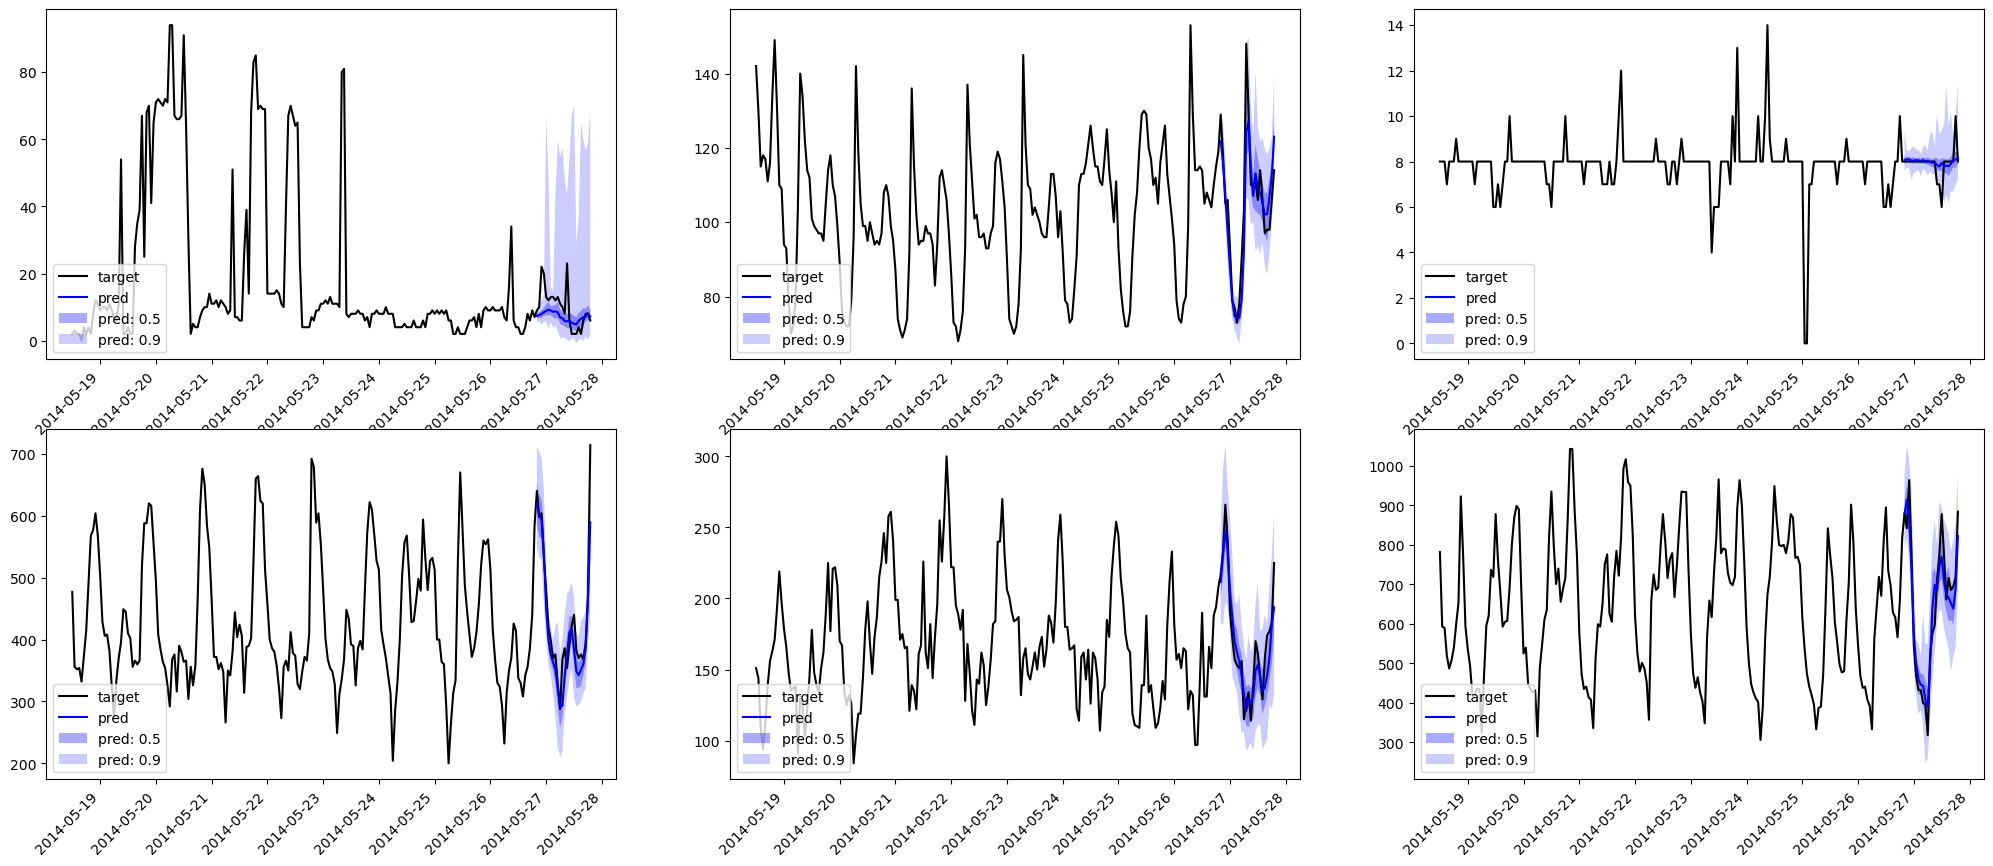

In [1]:
import matplotlib.pyplot as plt
from gluonts.dataset.repository import dataset_recipes

from uni2ts.eval_util.data import get_gluonts_test_dataset
from uni2ts.eval_util.plot import plot_next_multi
from uni2ts.model.moirai_moe import MoiraiMoEForecast, MoiraiMoEModule

SIZE = "small"  # model size: choose from {'small', 'base'}
CTX = 1000  # context length: any positive integer
BSZ = 32  # batch size: any positive integer

# Load dataset
test_data, metadata = get_gluonts_test_dataset(
    "electricity", prediction_length=None, regenerate=False
)
# Uncomment the below line to find other datasets
# print(sorted(dataset_recipes.keys()))

# Prepare model
model = MoiraiMoEForecast(
    module=MoiraiMoEModule.from_pretrained(
        f"Salesforce/moirai-moe-1.0-R-{SIZE}",
    ),
    prediction_length=metadata.prediction_length,
    context_length=CTX,
    patch_size=16,
    num_samples=100,
    target_dim=metadata.target_dim,
    feat_dynamic_real_dim=metadata.feat_dynamic_real_dim,
    past_feat_dynamic_real_dim=metadata.past_feat_dynamic_real_dim,
)

predictor = model.create_predictor(batch_size=BSZ)
forecasts = predictor.predict(test_data.input)

input_it = iter(test_data.input)
label_it = iter(test_data.label)
forecast_it = iter(forecasts)

# Visualize forecasts
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))
plot_next_multi(
    axes,
    input_it,
    label_it,
    forecast_it,
    context_length=200,
    intervals=(0.5, 0.9),
    dim=None,
    name="pred",
    show_label=True,
)